<h1>Kyphosis Dataset</h1>
<h4>Author: Chang Dakota Sum Kiu</h4>
<h4>Last Modified: 09/10/2021</h4>


---


<p>This notebook use a kyphosis dataset from https://www.kaggle.com/abbasit/kyphosis-dataset to explore the interpretability of Decision Trees.</p>

importing libraries and reading dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# decision tree = supervised
# regression trees vs classification trees
df = pd.read_csv('/content/kyphosis.csv')

Explore dataset

In [ ]:
df.tail(3)

,Kyphosis,Age,Number,Start
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


<p>
Dataset:
<br>
Kyphosis -- absent, present
<br>
Age -- days old
<br>
Number -- number of vertebraes
<br>
Start -- starting vertebrae
</p>

In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


Checking whether this dataset requires cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


One-hot encoding the dataset to prepare for training

In [ ]:
def kyphosis(x):
  if str(x)=='absent':
    return 0
  return 1

df['Kyphosis'] = df['Kyphosis'].apply(kyphosis)

In [ ]:
df.tail(3)

,Kyphosis,Age,Number,Start
78,0,120,2,13
79,1,42,7,6
80,0,36,4,13


Further exploration

In [ ]:
df.groupby('Kyphosis').count()

,Age,Number,Start
Kyphosis,,,
0,64,64,64
1,17,17,17


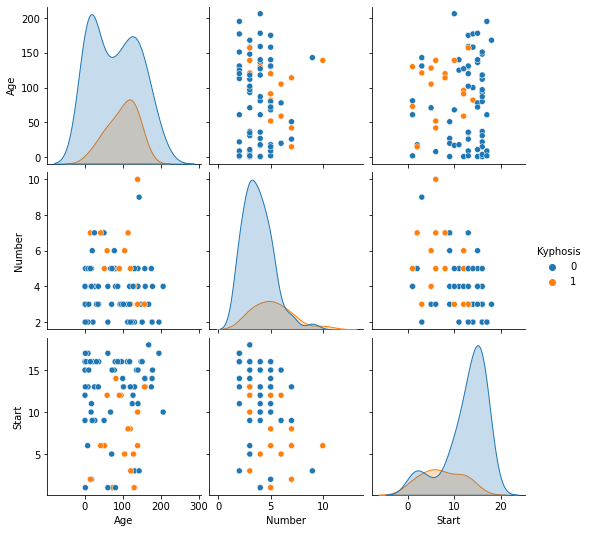

In [ ]:
sns.pairplot(df, hue='Kyphosis')

Splitting predictors and response into X and y

In [ ]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [ ]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [ ]:
y

0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

---

#Training machine learning model

Splitting training dataset and testing dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=98)

Importing and training machine learning model (Decision Tree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train) #using default criterion gini
y_pred = dtree.predict(X_test)

Evaluating model

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
confusion_matrix(y_test, y_pred)

array([[17,  3],
       [ 2,  3]])

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8


This model is not very accurate, and the dataset is also very small. There could be more fine tuning done. However, since this notebook focuses on exploring the decision tree, this will do for now

---

#Exploring the interpretability of decision tree

In [ ]:
from sklearn import tree

[Text(519.9545454545455, 509.625, 'X[2] <= 8.5\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(253.63636363636363, 441.675, 'X[1] <= 4.5\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(101.45454545454545, 373.725, 'X[0] <= 104.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(50.72727272727273, 305.775, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(152.1818181818182, 305.775, 'X[1] <= 3.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(101.45454545454545, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(202.9090909090909, 237.825, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(405.8181818181818, 373.725, 'X[2] <= 4.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(355.09090909090907, 305.775, 'X[2] <= 2.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(304.3636363636364, 237.825, 'X[0] <= 8.5\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(253.63636363636363, 169.875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(355.09090909090907, 169.875

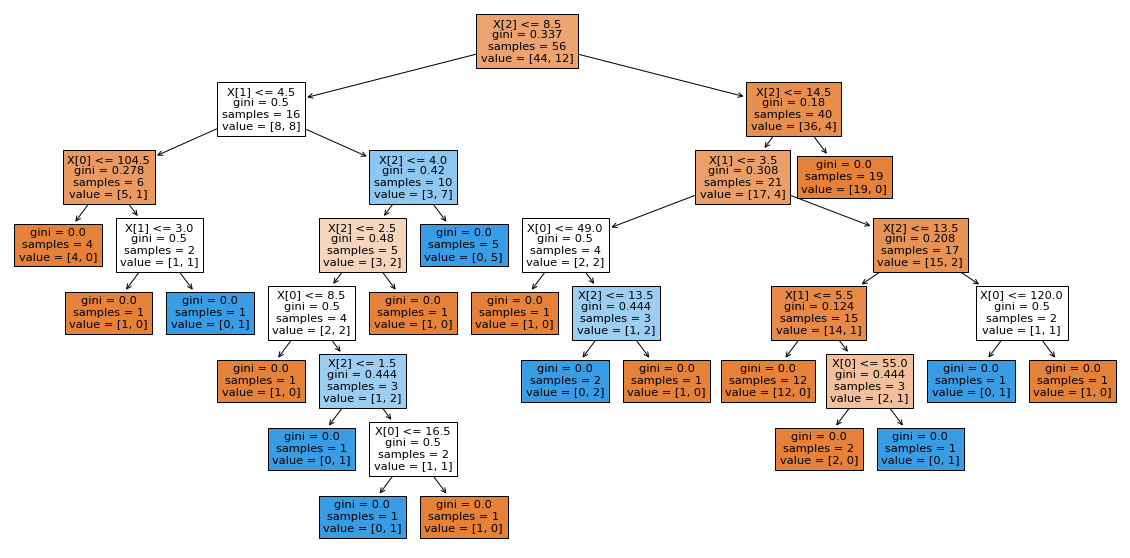

In [ ]:
fig, axes = plt.subplots(figsize=(20,10))
tree.plot_tree(dtree, filled=True)

Decision trees are amongst one of the most reliable models, as we can easily interpret the model and be able to check for biases within it.